<a href="https://colab.research.google.com/github/samikshyasanskruti/Deep-Learning/blob/main/MNIST_gradient_clipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist

In [2]:
(train_img,train_label),(test_img,test_label)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(train_img.shape)

(60000, 28, 28)


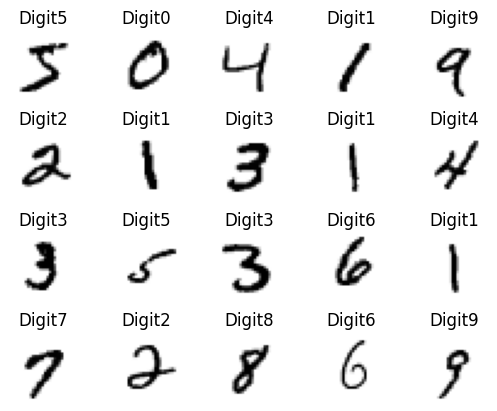

In [4]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title('Digit'+str(train_label[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

plt.show()

In [5]:
m,n=train_img[0].shape

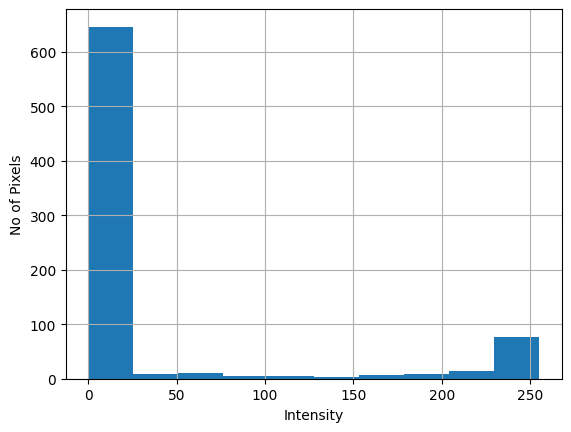

In [6]:
plt.hist(train_img[1122].reshape(m*n))
plt.xlabel('Intensity')
plt.ylabel('No of Pixels')
plt.grid()
plt.show()

In [7]:
#Scaling
train_img=train_img/225.0
test_img=test_img/225.0

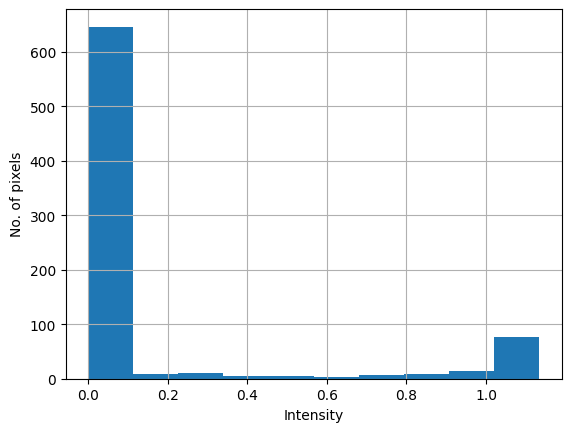

In [8]:

plt.hist(train_img[1122].reshape(m*n))
plt.xlabel('Intensity')
plt.ylabel('No. of pixels')
plt.grid()
plt.show()


In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model=Sequential()
model.add(Flatten(input_shape=(m,n)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_img,train_label,epochs=30)



Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9083 - loss: 0.3025
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9745 - loss: 0.0780
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9821 - loss: 0.0557
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0368
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9902 - loss: 0.0307
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9905 - loss: 0.0296
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0228
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9931 - loss: 0.0240
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0203
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9951 - loss: 0.0142
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9950 - loss: 0.0174
Epoch 12/30
1875/1875 ━━━━━━━━

In [11]:
loss_acc=model.evaluate(test_img,test_label)
print('Loss:',loss_acc[0])
print('Accuracy:',loss_acc[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.2182
Loss: 0.17501233518123627
Accuracy: 0.9807999730110168


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Value: 0


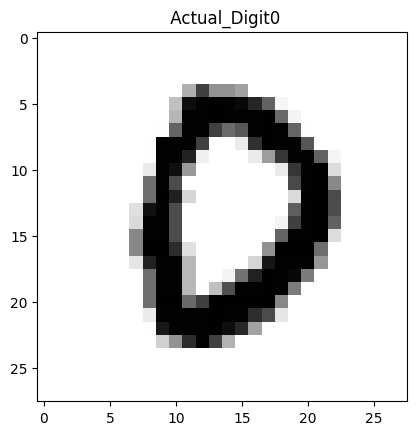

In [ ]:
index=4457
plt.imshow(test_img[index], cmap = 'gray_r')
plt.title(' Actual_Digit'+str(test_label[index]))

predicted=model.predict(test_img)

print('Predicted Value:',np.argmax(predicted[index]))